## Angewandtes Quantencomputing Laborpraktikum WiSe 25/26

### Musterlösung zu Praktikum 1: Qiskit und 1-Qubit Gatter (10.10.2025)

Wir benutzen Qiskit um Quantenschaltkreise zu erzeugen.

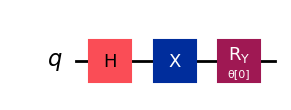

In [93]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

# Initialisiert einen leeren Quantenschaltkreis mit einem Qubit
quantum_circuit = QuantumCircuit(1)

# Fügt eine Hadamard-Gatter auf das erste Qubit hinzu
quantum_circuit.h(0)

# Fügt eine X-Gatter auf das erste Qubit hinzu
quantum_circuit.x(0)

# Qiskit bietet auch die Möglichkeit, freie Parameter für parametrisierte Gatter zu verwenden
p = ParameterVector('θ', 1)
# Fügt eine parametrische Rotationsgatter um die Y-Achse hinzu
quantum_circuit.ry(p[0], 0)  

# Generiert eine visuelle Darstellung des Schaltkreises
quantum_circuit.draw('mpl')

Wir importieren in den Musterlösungen Hilfsfunktionen die sich in dem Ordner ``qc_lecture_tools`` befinden.

Hier stehen aus dem Modul ``output_statevector`` folgende Funktionen zur Verfügung:
- ``sv_compute``: Funktion die aus dem Qiskit Quantenschaltkreis einen Zustandsvektor vom Typ Qiskit Statevector bestimmt
- ``sv_array``: Funktion die aus dem Qiskit Quantenschaltkreis den Zustandsvektor als numpy Array bestimmt
- ``sv_latex``: Erzeugt eine Latex Darstellung des Zustandsvektor, die Terme wie $\sqrt{2}$ darstellen kann
- ``sv_blochsphere``: Erzeugt eine Visualisierung des Zustandsvektors mit Hilfe der Blochsphäre
- ``sv_interactive_blochsphere``: Erzeugt eine interaktive Visualisierung des Quantenzustands mit der Blochsphäre für parametrisierte Schaltkreise. 
- ``matrix_to_latex``: Hilfsfunktion um Matrizen mit Latex zu visualisieren; konvertiert automatisch Terme wie $\sqrt{2}$.

In [94]:
from qc_lecture_tools.statevector import sv_compute, sv_array, sv_latex, sv_blochsphere, sv_interactive_blochsphere, matrix_to_latex

#Beispielaufrufe der Funktionen:
quantum_circuit = QuantumCircuit(1)
quantum_circuit.h(0)
quantum_circuit.x(0)

print("Zustandsvektor als Array:", sv_array(quantum_circuit))
print("Zustandsvektor als LaTeX:")
sv_latex(quantum_circuit)

Zustandsvektor als Array: [0.70710678+0.j 0.70710678+0.j]
Zustandsvektor als LaTeX:


<IPython.core.display.Math object>

Zustandsvektor als Bloch-Sphäre:


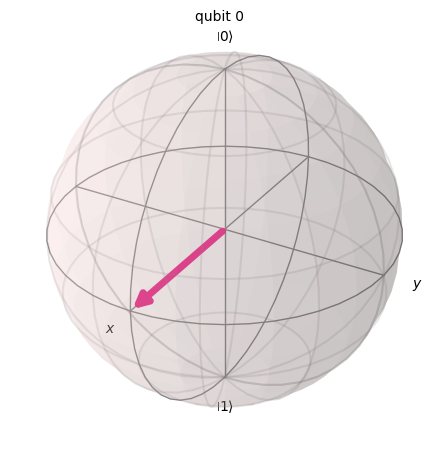

In [95]:
print("Zustandsvektor als Bloch-Sphäre:")
sv_blochsphere(quantum_circuit)

In [96]:
# Beispiel für einen parametrisierten Schaltkreis mit interaktiver Bloch-Sphären-Darstellung
from qiskit.circuit import ParameterVector
qc = QuantumCircuit(1)
p = ParameterVector('θ', 2)
qc.ry(p[0], 0)
qc.rx(p[1], 0)
qc.s(0)
sv_interactive_blochsphere(qc)

interactive(children=(FloatSlider(value=0.0, description='θ[0]', max=6.283185307179586, min=-6.283185307179586…

<function qc_lecture_tools.statevector.sv_interactive_blochsphere.<locals>.plot_ry(**parameter_values)>

### Lösung zu Aufgabe 1

**Aufgabenstellung:** Wir schauen uns folgenden Quantenschaltkreis und  an:

```python
import numpy as np
from qiskit import QuantumCircuit

# Quantencircuit mit einem RY-Gatter
circuit = QuantumCircuit(1)
theta = np.pi # Winkel in Radiant
circuit.ry(theta,0)

# Zustandsvektor in ein 2D Numpy Array umwandeln
np.array(Statevector.from_instruction(quantum_circuit))
```

- Plotte die Amplituden für den 0 und 1 Zustand für verschiedene Winkel.
- Wie sieht die Gleichung für den Quantenzustand nach Anwendung des Ry Gatter aus?
- Wie sehen die Wahrscheinlichkeiten einen 0 oder 1 Zustand zu Messen in Abhängigkeit vom Winkel ab? 
- Überprüfen sie, ob der Zustand immer normiert ist.

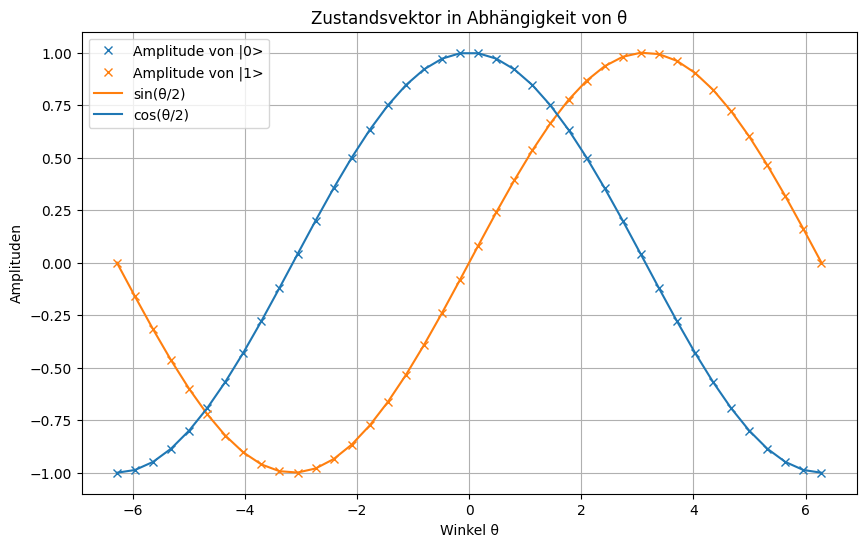

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Definition von Hilfsfunktion zur Berechnung des Zustandsvektors in Abhängigkeit von θ
def sv_ry(theta):
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    return np.array(sv_compute(qc))

theta_values = np.linspace(-2*np.pi, 2*np.pi, 40)

# Berechnung des Zustandsvektors für verschiedene Werte von θ
data = np.real(np.array([ sv_ry(theta) for theta in theta_values ]).transpose())

# Plotten der Amplituden
plt.figure(figsize=(10, 6))
plt.plot(theta_values, data[0], 'x', label='Amplitude von |0>', color='C0')
plt.plot(theta_values, data[1], 'x', label='Amplitude von |1>', color='C1')
plt.plot(theta_values, np.sin(theta_values/2), label='sin(θ/2)', color='C1')
plt.plot(theta_values, np.cos(theta_values/2), label='cos(θ/2)', color='C0')
plt.legend()
plt.xlabel('Winkel θ')
plt.ylabel('Amplituden')
plt.title('Zustandsvektor in Abhängigkeit von θ')
plt.grid()

**Formel für den Quantenzustand:**  $\ket{\Psi} = \cos(\theta/2)\ket{0} + \sin(\theta/2)\ket{1}$

**Plotten der Wahrscheinlichkeiten und deren Summe**

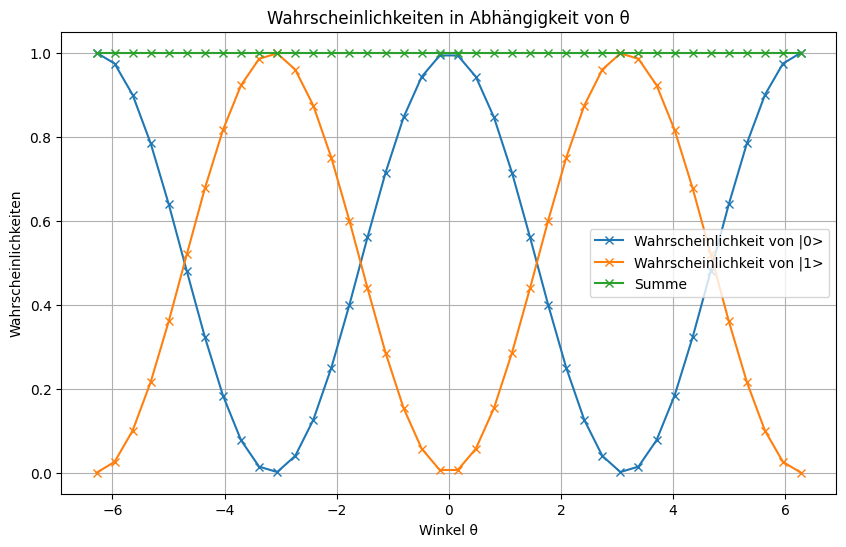

In [98]:
# Plotten der Wahrscheinlichkeiten und deren Summe

p0 = np.square(np.abs(data[0]))
p1 = np.square(np.abs(data[1]))

norm = p0 + p1


plt.figure(figsize=(10, 6))
plt.plot(theta_values, p0, '-x', label='Wahrscheinlichkeit von |0>', color='C0')
plt.plot(theta_values, p1, '-x', label='Wahrscheinlichkeit von |1>', color='C1')
plt.plot(theta_values, norm, '-x', label='Summe', color='C2')
plt.legend()
plt.xlabel('Winkel θ')
plt.ylabel('Wahrscheinlichkeiten')
plt.title('Wahrscheinlichkeiten in Abhängigkeit von θ')
plt.grid()

Die Summe ist immer 1, daher der Quantenzustand ist normiert. Dies folgt auch aus der trigonometrische Pythagoras-Identität: $\sin^2(x) + \cos^2(x)=1$ 

### Lösung zu Aufgabe 2

**Aufgabenstellung:**

- Finde mit Hilfe der im Notebook verfügbaren Hilfsmittel heraus, wie die Quantengatter auf Quantenzustände wirken.
- Wie sehen die Matrizen der Quantengatter aus?

**Quantengatter:**
- Pauli-X: ``quantum_circuit.x(0)``
- Pauli-Y: ``quantum_circuit.y(0)``
- Pauli-Z: ``quantum_circuit.z(0)``
- Hadamard-Gatter: ``quantum_circuit.h(0)``
- S-Gatter:  ``quantum_circuit.s(0)``
- T-Gatter:  ``quantum_circuit.t(0)``
- Rx-Rotation: ``quantum_circuit.Rx(angle, 0)``
- Ry-Rotation: ``quantum_circuit.Rz(angle, 0)``
- Rz-Rotation: ``quantum_circuit.Ry(angle, 0)``

**Hinweis:** der 1-Zustand kann durch die Anwendung des Pauli-X Gatters auf den 0-Zustand generiert werden.


Generell können wir die Matrizen mit folgendem Ansatz herausfinden:
$\mathbf{U} =
\begin{pmatrix}
\braket{0|{U}|0} & \braket{0|{U}|1} \\
\braket{1|{U}|0} & \braket{1|{U}|1}
\end{pmatrix}
$

Wir können also die Zustandsvektoren die sich nach der Anwendung der Quantengatter auf die Basiszustände ergeben als Spalten in der Matrix zusammenfüren:
$\mathbf{U} = \Bigg(
\Big(
U\ket{0}
\Big)
\Big(
U\ket{1}
\Big)
\Bigg)
$

In [99]:
from IPython.display import display

In [100]:
def analyse_gate(gate_name:str):

    def add_gate(qc, gate_name):
        if gate_name == "X":
            qc.x(0)
        elif gate_name == "Y":
            qc.y(0)
        elif gate_name == "Z":
            qc.z(0)
        elif gate_name == "H":
            qc.h(0)
        elif gate_name == "S":
            qc.s(0)
        elif gate_name == "T":
            qc.t(0)
        # Add more gates as needed
        return qc

    # Hadamard Gatter:
    quantum_circuit_0 = QuantumCircuit(1)
    quantum_circuit_0 = add_gate(quantum_circuit_0, gate_name)
    quantum_circuit_1 = QuantumCircuit(1)
    quantum_circuit_1.x(0) # Change to State |1>
    quantum_circuit_1 = add_gate(quantum_circuit_1, gate_name)

    # Calculate the statevectors after applying the Z gate to |0> and |1>
    psi_0 = sv_array(quantum_circuit_0)
    psi_1 = sv_array(quantum_circuit_1)

    print(f"Action of the {gate_name} gate on the 0 State:")
    display(sv_latex(quantum_circuit_0))
    print(f"Action of the {gate_name} gate on the 1 State:")
    display(sv_latex(quantum_circuit_1))

    # Combine the statevectors into a matrix
    matrix = np.column_stack((psi_0, psi_1))

    #Print the X matrix in LaTeX format
    matrix_to_latex(matrix, label=gate_name+"=")

In [101]:
analyse_gate("X")

Action of the X gate on the 0 State:


<IPython.core.display.Math object>

Action of the X gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [102]:
analyse_gate("Y")

Action of the Y gate on the 0 State:


<IPython.core.display.Math object>

Action of the Y gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [103]:
analyse_gate("Z")

Action of the Z gate on the 0 State:


<IPython.core.display.Math object>

Action of the Z gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [104]:
analyse_gate("H")

Action of the H gate on the 0 State:


<IPython.core.display.Math object>

Action of the H gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [105]:
analyse_gate("S")

Action of the S gate on the 0 State:


<IPython.core.display.Math object>

Action of the S gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [106]:
analyse_gate("T")

Action of the T gate on the 0 State:


<IPython.core.display.Math object>

Action of the T gate on the 1 State:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Die Rotationsgatter schauen wir uns zunächst in der Bloch-Sphäre an, wir starten zunächst mit dem Ry-Gatter

In [ ]:
from qiskit.circuit import ParameterVector
p = ParameterVector('θ', 1)
qc = QuantumCircuit(1)
qc.ry(p[0], 0)

bloch = sv_interactive_blochsphere(qc)

interactive(children=(FloatSlider(value=0.0, description='θ[0]', max=6.283185307179586, min=-6.283185307179586…

Wir sehen, dass der Quantenzustand in der Bloch-Sphäre um die Y-Achso rotiert wird. 

In [108]:
for angle in [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]:

    quantum_circuit_0 = QuantumCircuit(1)
    quantum_circuit_0.ry(angle, 0)
    quantum_circuit_1 = QuantumCircuit(1)
    quantum_circuit_1.x(0) # Change to State |1>
    quantum_circuit_1.ry(angle, 0)
    psi_0 = sv_array(quantum_circuit_0)
    psi_1 = sv_array(quantum_circuit_1)
    matrix = np.column_stack((psi_0, psi_1))
    matrix_to_latex(matrix, label=f"R_y({angle})=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Mit dem Wissen aus Aufgabe 1 und den Identiäten $\sin(0)=0, \cos(0)=1, \sin(\pi/4)=1/\sqrt{2}$, etc können wir folgende Matrix schlussfolgern:

$
R_y(\theta) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & cos(\theta/2)
\end{pmatrix}
$

Als nächstes kommt das Rx-Gatter

In [ ]:
from qiskit.circuit import ParameterVector
p = ParameterVector('θ', 1)
qc = QuantumCircuit(1)
qc.rx(p[0], 0)

bloch = sv_interactive_blochsphere(qc)

interactive(children=(FloatSlider(value=0.0, description='θ[0]', max=6.283185307179586, min=-6.283185307179586…

Wir sehen, dass Rx Gatter dreht den Zustandsvektor um die X-Achse der Blochsphäre rotiert.

In [110]:
for angle in [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]:

    quantum_circuit_0 = QuantumCircuit(1)
    quantum_circuit_0.rx(angle, 0)
    quantum_circuit_1 = QuantumCircuit(1)
    quantum_circuit_1.x(0) # Change to State |1>
    quantum_circuit_1.rx(angle, 0)
    psi_0 = sv_array(quantum_circuit_0)
    psi_1 = sv_array(quantum_circuit_1)
    matrix = np.column_stack((psi_0, psi_1))
    matrix_to_latex(matrix, label=f"R_x({angle})=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Wir sehen, dass das die Matrix des Rx Gatter ähnliche Werte wie das Ry Gatter enthält, jedoch in der Nebendiagonale komplexe statt reelle Zahlen enthält und das Vorzeichen unten linbks sich ändert. Wir schlussfolgern, dass die Matrix folgende Struktur haben muss:

$
R_x(\theta)= 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2) \\
-i\sin(\theta/2) & cos(\theta/2)
\end{pmatrix}
$

Wenden wir uns nun final dem Rz-Gatter zu. Die Vermutung liegt nahe, dass das Rz Gatter um die Z-Achse rotiert. Wenn mit dem o-Zustand starten wir jedoch schon in der Z-Achse und man sieht keine Rotation. Deshlab visualiseren wir die Bochsphäre mit dem Quantenzustand nach der Anwendung des Hadamard-Gatters

In [ ]:
from qiskit.circuit import ParameterVector
p = ParameterVector('θ', 1)
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(p[0], 0)

bloch = sv_interactive_blochsphere(qc)

interactive(children=(FloatSlider(value=0.0, description='θ[0]', max=6.283185307179586, min=-6.283185307179586…

Unsere Vermutung bestätigt sich, die Rz-Gatter rotiert um die Z-Achse.

In [112]:
for angle in [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]:

    quantum_circuit_0 = QuantumCircuit(1)
    quantum_circuit_0.rz(angle, 0)
    quantum_circuit_1 = QuantumCircuit(1)
    quantum_circuit_1.x(0) # Change to State |1>
    quantum_circuit_1.rz(angle, 0)
    psi_0 = sv_array(quantum_circuit_0)
    psi_1 = sv_array(quantum_circuit_1)
    matrix = np.column_stack((psi_0, psi_1))
    matrix_to_latex(matrix, label=f"R_z({angle})=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Wir sehen, dass die Matrix nur Einträge auf der Diagonalen enthält!

Nutzen wir die identität: $e^{i \theta} = \cos(\theta) + i\sin(\theta)$ sehen wir, dass die Rz matrix folgende Struktur hat:

$
R_z(\theta) = \begin{pmatrix}
e^{i\theta/2} & 0 \\ 0 & e^{i\theta/2}
\end{pmatrix}
$


### Lösungen für Aufgabe 3

**Lösung 3.1**: Quantenschaltkreisum Zustand $\ket{\Psi_1} = \frac{1}{\sqrt{2}}\big[\ket{0} - \ket{1}\big]$ zu präparieren

In [113]:
# Zustände:

qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.2**: Quantenschaltkreisum Zustand $\ket{\Psi_2} = \frac{1}{\sqrt{2}}\big[\ket{0} - i \ket{1}\big]$ zu präparieren

In [114]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.s(0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.3**: Quantenschaltkreis um Zustand $\ket{\Psi_3} = i \ket{0}$ zu präparieren

In [115]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.y(0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.4**: Quantenschaltkreis um Zustand $\ket{\Psi_4} = i \ket{1}$ zu präparieren

In [116]:
qc = QuantumCircuit(1)
qc.y(0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.5**: Quantenschaltkreis 1 um Zustand $\ket{\Psi_5} = \frac{1}{2} \ket{0} - \frac{\sqrt{3}}{2} \ket{1}$ zu präparieren

In [117]:

qc.x(0)
qc.ry(-300/180*np.pi,0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.5**: Quantenschaltkreis 2 um Zustand $\ket{\Psi_5} = \frac{1}{2} \ket{0} - \frac{\sqrt{3}}{2} \ket{1}$ zu präparieren

In [118]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.ry(60/180*np.pi,0)
sv_latex(qc)

<IPython.core.display.Math object>

**Lösung 3.6**: Quantenschaltkreis um Zustand $\ket{\Psi_6}=\big(\frac{1}{2} + \frac{i}{2} \big)\ket{0} + \big(\frac{1}{2} + \frac{i}{2} \big) \ket{1}$ zu präparieren

In [119]:
qc = QuantumCircuit(1)
qc.x(0)
qc.t(0)
qc.h(0)
qc.z(0)
sv_latex(qc)

<IPython.core.display.Math object>